In [ ]:
!pip install ripser persim
!pip install giotto-tda
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripser: filename=ripser-0.6.4-cp310-cp310-linux_x86_64.whl size=754688 sha256=a55beb19d5619aa54dda085009f10376e11d3fb7d6a2d7b366d37955724dfffa
  Stored in directory: /root/.cache/pip/wheels/c5/f5/66/f41f708b049057431155934f74e20ca6001a085fcd2e615150
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=2e3fef7d96a59e3d9d3818bf2fc59a259f4d8b346b8f7b1bccf75b8a4e17dd86
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built ripser hopcroftkarp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.1 MB/s eta 0:00:00
   

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


from sklearn.metrics import silhouette_score
from scipy.fft import fft, ifft
from ripser import  ripser
from persim import PersImage
from persim import PersistenceImager
from ripser import Rips
from gtda.plotting import plot_point_cloud
from gtda.time_series import SingleTakensEmbedding
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_point_cloud, plot_diagram
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from gtda.plotting import plot_diagram
import plotly.graph_objs as go
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from scipy.fft import fft, ifft
import seaborn as sns
from sklearn.manifold import TSNE
from scipy.signal import find_peaks
from persim import plot_diagrams
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import persim

In [ ]:
df = pd.read_csv("/content/Commercial Bank Of Ceylon PLC.csv",index_col='Date', parse_dates=True)
df.index = pd.to_numeric(df.index)
data = df[[' Open']].to_numpy()

In [ ]:
time_series = df[' Open'].values

close_prices = df[' Close'].values
Open_prices = df[' Open'].values
correaltion = np.corrcoef(close_prices,Open_prices)
print(correaltion)

[[1.        0.9983624]
 [0.9983624 1.       ]]


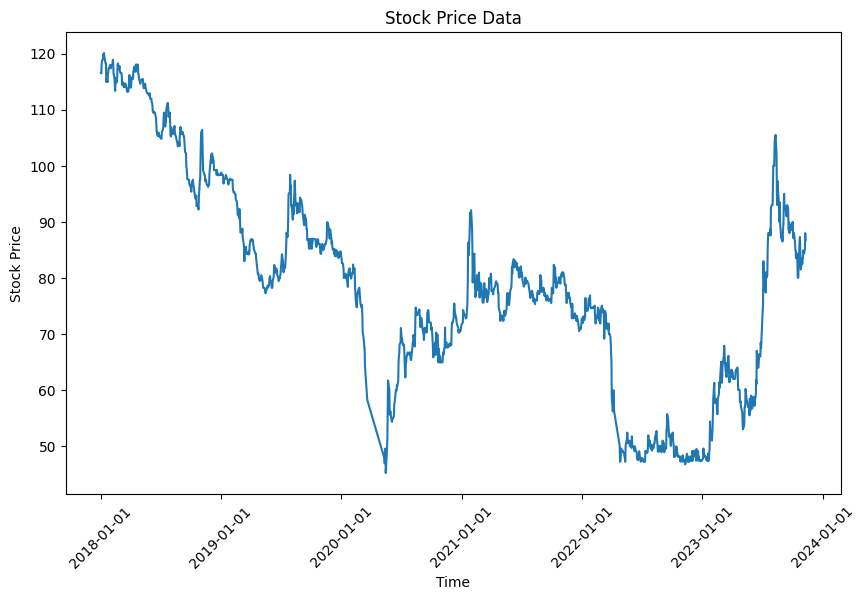

In [ ]:
# Load your CSV file without specifying the date format
df = pd.read_csv("/content/Commercial Bank Of Ceylon PLC.csv", parse_dates=['Date'])
# If Pandas does not correctly parse the 'Date' column, convert it manually
# Replace '%Y-%m-%d' with the actual format of your date column
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Extract the ' Open' price data or your specific time series data
# Replace ' Open' with the actual column name from your dataset
time_series = df[' Open']  # Replace ' Open' with your actual column name

# Now plot the data
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Data')

# Format the x-axis to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

plt.show()


In [ ]:
embedding_dimensions = [2, 3, 4, 5]

all_embedded_datasets = []

for dim in embedding_dimensions:
    # Create a time delay embedded dataset from the subwindow with the current embedding dimension
    embedded_data = []
    for i in range(len(data) - dim + 1):
        embedded_data.append(data[i:i + dim])

    embedded_data = np.array(embedded_data)

    # Append the embedded dataset to the list
    all_embedded_datasets.append(embedded_data)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


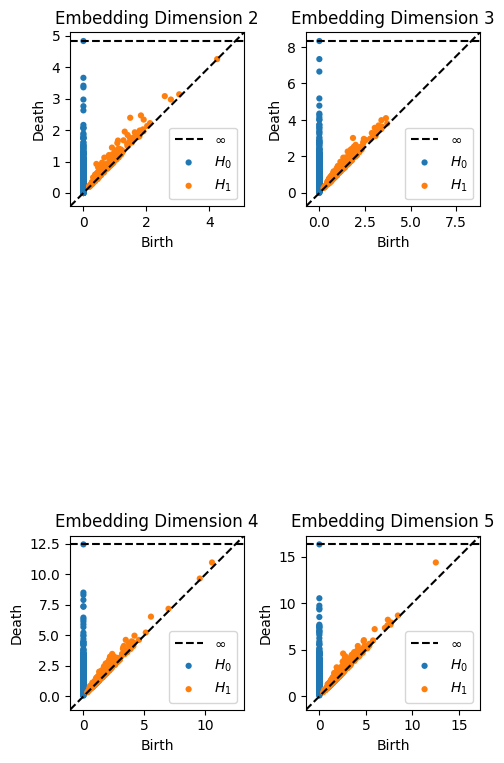

In [ ]:
# Assuming 'data' and 'embedding_dimensions' are defined earlier in your code
all_diagrams = []

# Loop through each embedding dimension
for dim in embedding_dimensions:
    # Create a time delay embedded dataset from the subwindow with the current embedding dimension
    embedded_data = []
    for i in range(len(data) - dim + 1):
        embedded_data.append(data[i:i + dim])

    embedded_data = np.array(embedded_data)

    # Ensure embedded_data is 2D
    if embedded_data.ndim > 2:
        embedded_data = embedded_data.reshape(embedded_data.shape[0], -1)

    # Perform persistent homology analysis using Ripser
    rips = Rips(maxdim=1, thresh=float('inf'), coeff=2, do_cocycles=False, n_perm=None, verbose=True)
    diagrams = rips.fit_transform(embedded_data)

    # Append the persistence diagram to the list
    all_diagrams.append(diagrams)

# Determine the layout for subplots based on the number of embedding dimensions
num_embedding_dimensions = len(embedding_dimensions)
num_cols = 2  # Set the number of columns

# Calculate the number of rows required
num_rows = int(np.ceil(num_embedding_dimensions / num_cols))

# Create subplots with the calculated layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 6 * num_rows))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Plot persistence diagrams for each embedding dimension
for i, diagrams in enumerate(all_diagrams):
    if i >= num_embedding_dimensions:
        break  # Exit the loop if there are no more embedding dimensions to plot

    ax = axes[i]
    rips.plot(diagrams, ax=ax)
    ax.set_title(f'Embedding Dimension {embedding_dimensions[i]}')

# Remove any unused subplots
for i in range(num_embedding_dimensions, num_cols * num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


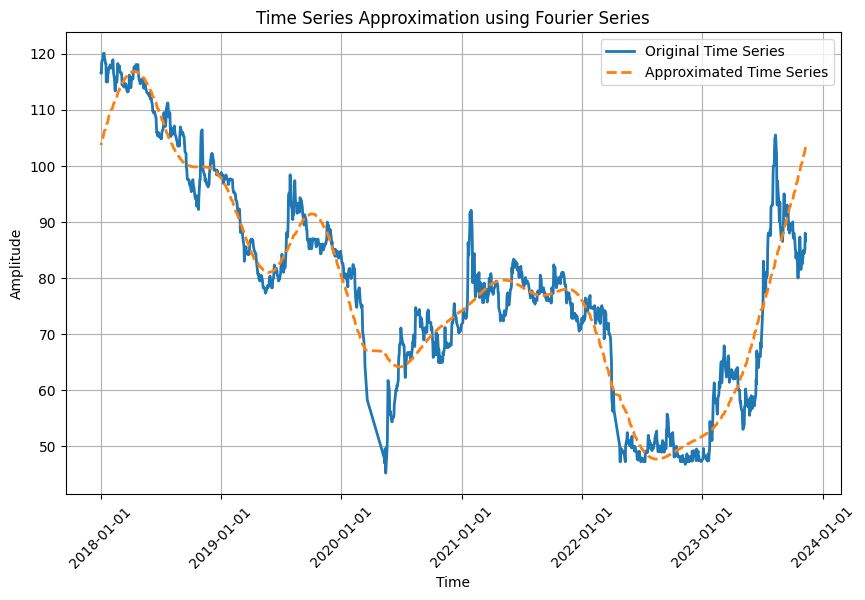

In [ ]:
# Assuming df is your DataFrame and it has been loaded
# Assuming ' Open' is the name of the column you're using
time_series = df[' Open'].values  # Ensure this column name matches your DataFrame

# Perform the Fourier transform
fourier_transform = fft(time_series)

# Number of components to keep (you can adjust this as needed)
num_components_to_keep = 10

# Set coefficients beyond num_components_to_keep to zero
fourier_transform[num_components_to_keep:-num_components_to_keep] = 0

# Perform the inverse Fourier transform to get the approximated time series
approximated_time_series = ifft(fourier_transform)

# Plot the original and approximated time series for comparison
plt.figure(figsize=(10, 6))
plt.plot(df.index, time_series, label="Original Time Series", lw=2)
plt.plot(df.index, approximated_time_series, label="Approximated Time Series", linestyle='dashed', lw=2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Time Series Approximation using Fourier Series")
plt.grid(True)

# Format the x-axis to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

plt.show()


In [ ]:
real_part_approximated_time_series = np.real(approximated_time_series)

embedding_dimension_periodic = 3
embedding_time_delay_periodic = 8
stride = 10

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(real_part_approximated_time_series)
print(f"Shape of embedded time series: {y_periodic_embedded.shape}")


plot_point_cloud(y_periodic_embedded)

Shape of embedded time series: (136, 3)


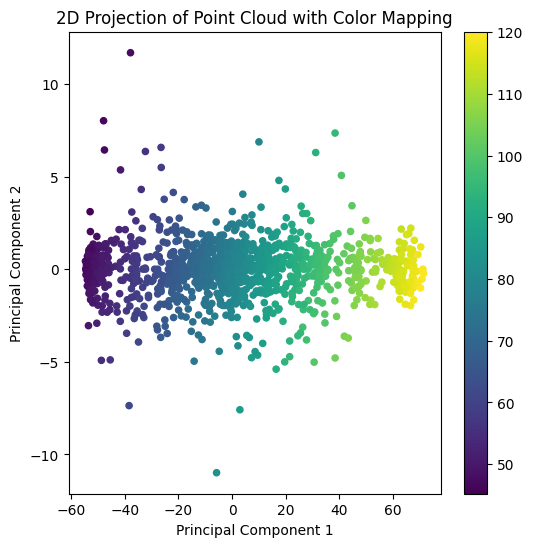

Explained Variance by Component: [0.99742404 0.00201769]


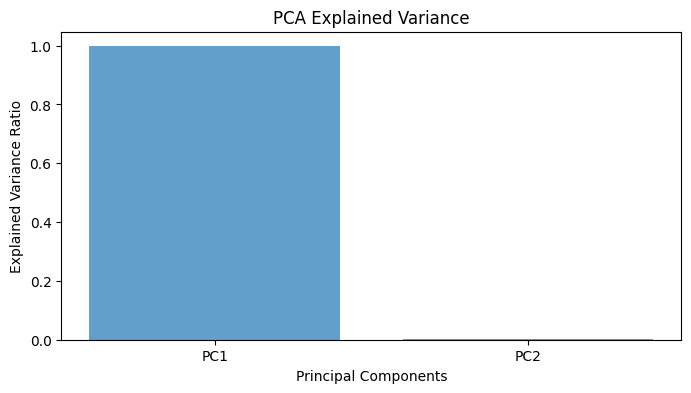

In [ ]:
embedding_dimension = 3
embedding_time_delay = 1
takens_embedding = SingleTakensEmbedding(parameters_type='fixed', time_delay=embedding_time_delay, dimension=embedding_dimension)
point_cloud = takens_embedding.fit_transform(time_series.reshape(-1, 1))

# Assuming 'point_cloud' is already defined
# Perform PCA
pca = PCA(n_components=2)
point_cloud_2d = pca.fit_transform(point_cloud)

# Truncate 'colors' array to match the length of 'point_cloud_2d'
colors = time_series[:len(point_cloud_2d)]

# Plot the 2D projection of the point cloud
plt.figure(figsize=(6, 6))
plt.scatter(point_cloud_2d[:, 0], point_cloud_2d[:, 1], s=20, c=colors, cmap='viridis')
plt.title('2D Projection of Point Cloud with Color Mapping')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()  # Add a colorbar to indicate the mapping
plt.show()

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print the explained variance
print("Explained Variance by Component:", explained_variance)

# Plot the explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, tick_label=['PC1', 'PC2'])
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.show()

In [ ]:
# Assuming 'point_cloud' is already defined
# Perform PCA
pca = PCA(n_components=2)
point_cloud_2d = pca.fit_transform(point_cloud)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance by the first two components
total_explained_variance = sum(explained_variance)

# Check if the total explained variance is greater than 60%
if total_explained_variance > 0.60:
    print(f"The first two principal components explain more than 60% of the variance: {total_explained_variance * 100:.2f}%")
else:
    print(f"The first two principal components explain less than 60% of the variance: {total_explained_variance * 100:.2f}%")


The first two principal components explain more than 60% of the variance: 99.94%


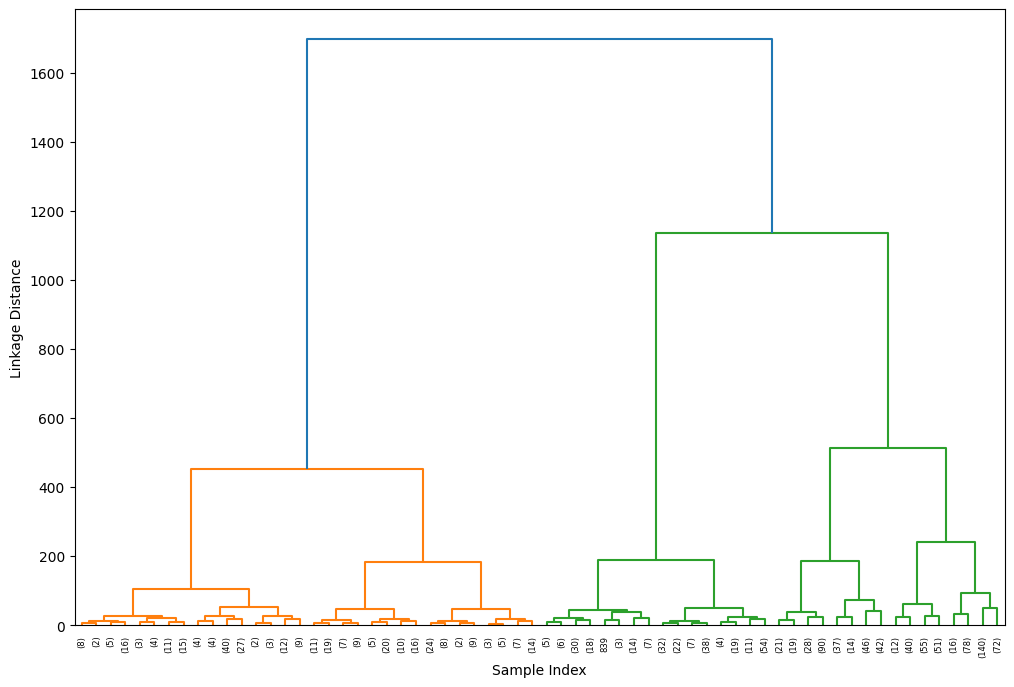

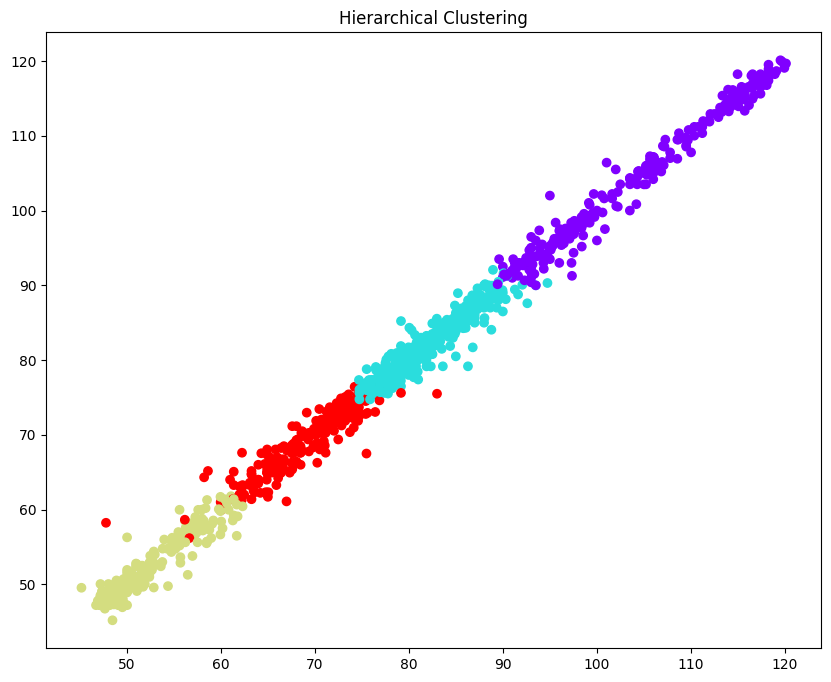

In [ ]:
# Assuming 'all_embedded_datasets' is defined and contains 3D arrays
data = all_embedded_datasets[3]

# Check if data is 2D, if not, reshape or slice it
if data.ndim != 2:
    # Example reshape, modify as needed for your specific dataset
    data = data.reshape(data.shape[0], -1)

plt.figure(figsize=(12, 8))
# Perform hierarchical clustering
linkage_matrix = linkage(data, method='ward')

# Plot dendrogram
dendrogram(linkage_matrix, p=5, truncate_mode='level')
plt.xlabel("Sample Index")
plt.ylabel("Linkage Distance")
plt.show()

# Perform agglomerative clustering
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clustering.fit(data)

cluster_labels = agg_clustering.labels_

fig, axes = plt.subplots(figsize=(10, 8))
# Plot clusters
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='rainbow')
plt.title("Hierarchical Clustering")
plt.show()

#The clustering method used in the provided code is Agglomerative Clustering.
#This is a type of hierarchical clustering technique which builds nested clusters by merging or splitting them successively
#Agglomerative Clustering, as used in your code, is a bottom-up approach to clustering. In this method, each data point starts as its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
#This process continues until all points are merged into a single cluster or until the desired number of clusters is reached. This approach is in contrast to divisive clustering, which is a top-down approach, starting with all points in one cluster and successively splitting them.

In [ ]:
# Evaluate the clustering performance using silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data, cluster_labels)
print("Silhouette Score: ", silhouette_avg)


Silhouette Score:  0.5428303698444275


In [ ]:
# Train a KMeans model for prediction
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [ ]:
# Anomaly Detection
# Calculate the distance of each point from its cluster center
distances = np.linalg.norm(data - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Set a threshold to determine anomalies
# For example, you could set the threshold as the mean + 2 * standard deviation of the distances
threshold = np.mean(distances) + 2 * np.std(distances)

# Identify anomalies
anomalies = np.where(distances > threshold)[0]
print("Anomalies (based on distance threshold): ", anomalies)

Anomalies (based on distance threshold):  [  59   60   64   92   93   94   95   96   97   98  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  163  164  165  166  167  380  381  718
  719  720  721  792  793  794  795  796  808  809  810  840  841 1142
 1143 1144 1145 1146 1147 1148 1162 1163 1167 1196 1197]


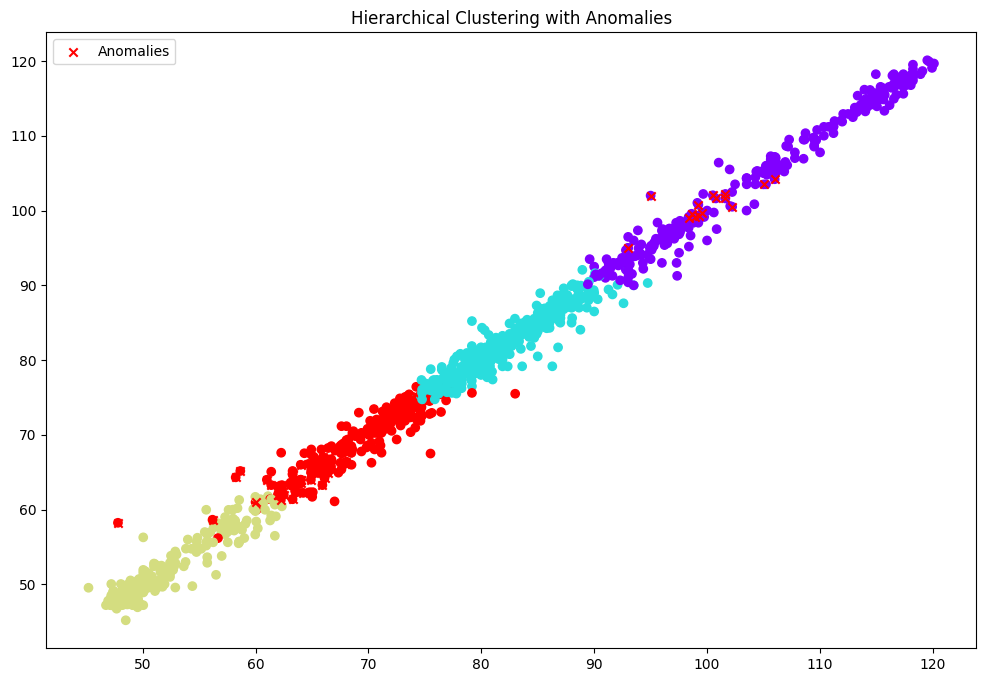

In [ ]:
# Plot the clusters and anomalies
plt.figure(figsize=(12, 8))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='rainbow')
plt.scatter(data[anomalies, 0], data[anomalies, 1], c='red', marker='x', label='Anomalies')
plt.title("Hierarchical Clustering with Anomalies")
plt.legend()
plt.show()

In [ ]:
# Perform hierarchical clustering
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clustering.fit(data)

# Get cluster labels for each data point
cluster_labels = agg_clustering.labels_

# Compute and plot persistence diagrams for each cluster
for i in range(n_clusters):
    cluster_data = data[cluster_labels == i]

    # Compute persistence diagrams
    persistence = VietorisRipsPersistence(homology_dimensions=[0, 1], n_jobs=-1)
    diagrams = persistence.fit_transform([cluster_data])

    # Plot persistence diagrams using Plotly
    fig = plot_diagram(diagrams[0], plotly_params={"layout": {"title": f"Cluster {i + 1}"}})
    fig.show()


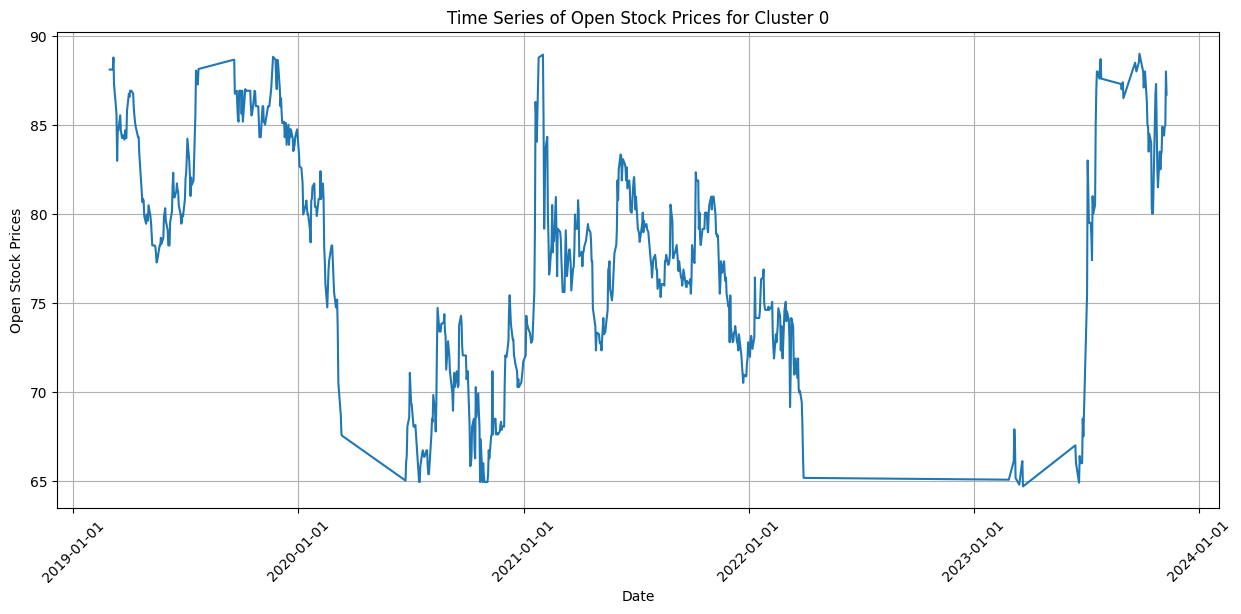

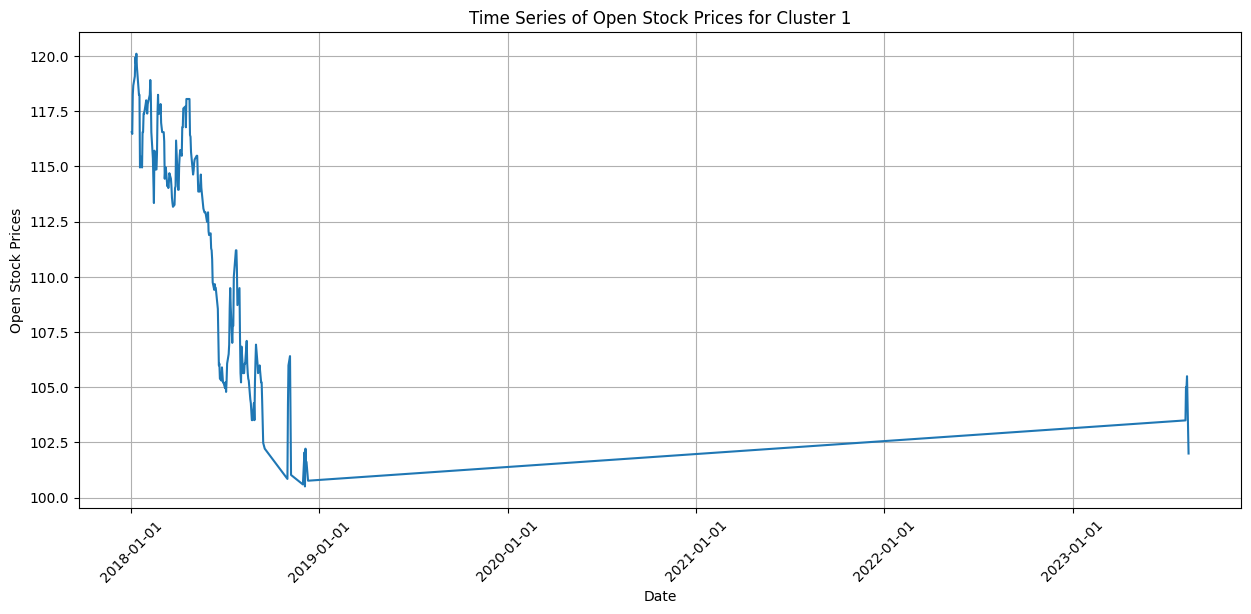

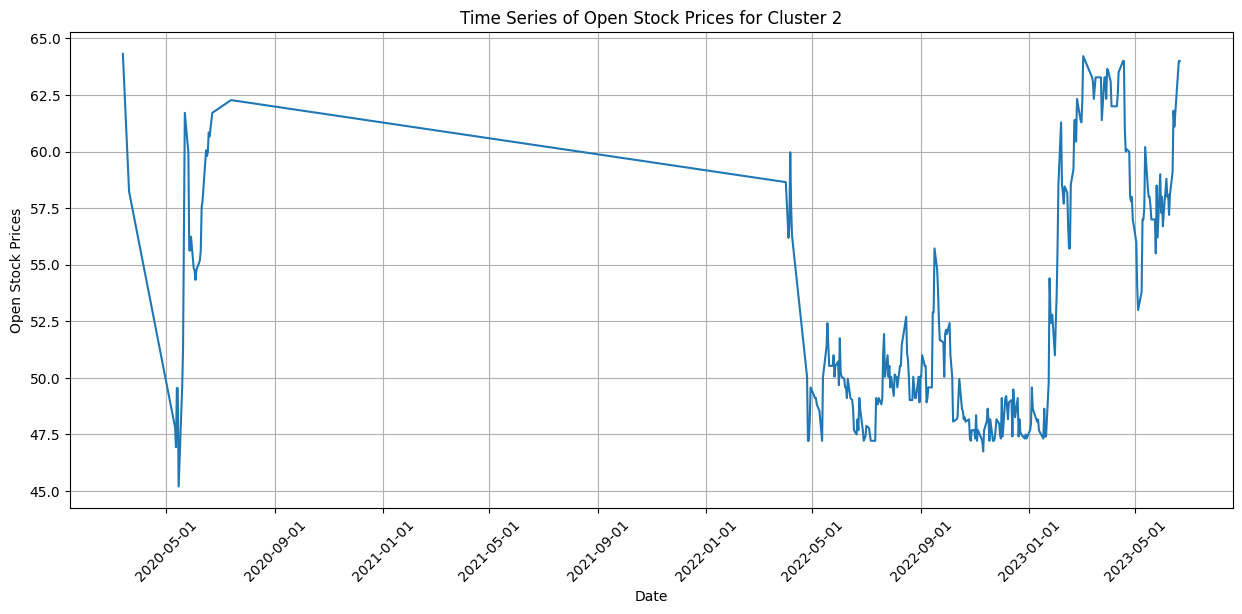

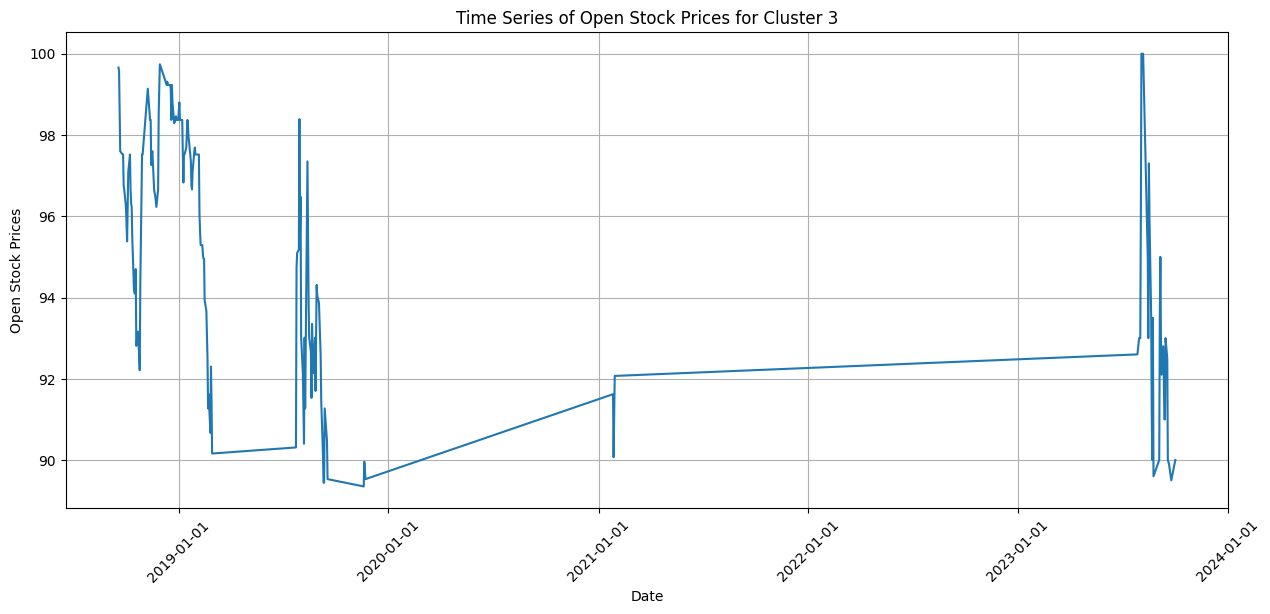

In [ ]:
# Assuming 'df' is already loaded
# Convert index to datetime if not already
df.index = pd.to_datetime(df.index)

data_for_clustering = df[[' Open']].values

# Fit the AgglomerativeClustering model
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(data_for_clustering)

# Assign cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Plot the time series of open stock prices for each cluster
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.figure(figsize=(15, 7))
    plt.plot(cluster_data[' Open'])
    plt.title(f'Time Series of Open Stock Prices for Cluster {cluster}')
    plt.xlabel('Date')
    plt.ylabel('Open Stock Prices')
    plt.grid(True)

    # Simplified date formatting
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.2)

    plt.show()


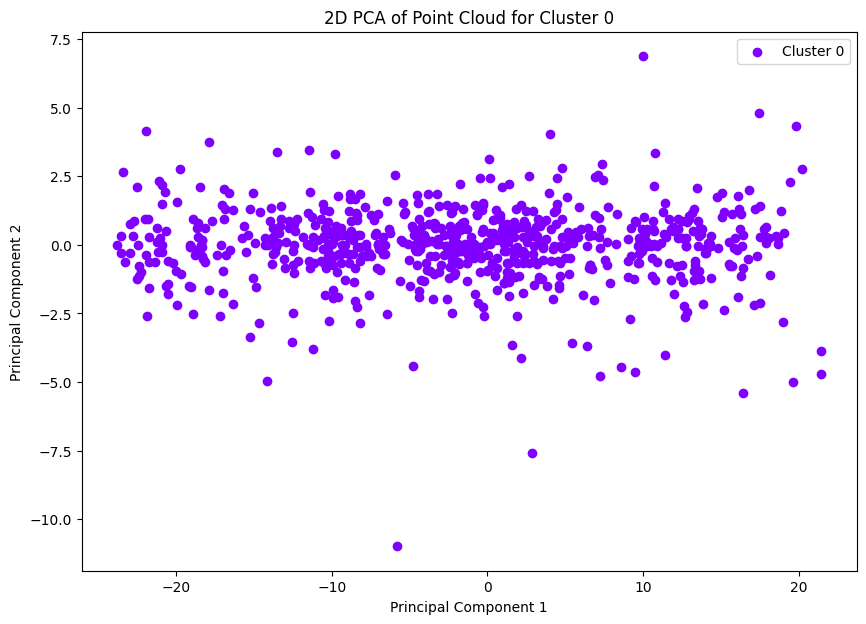

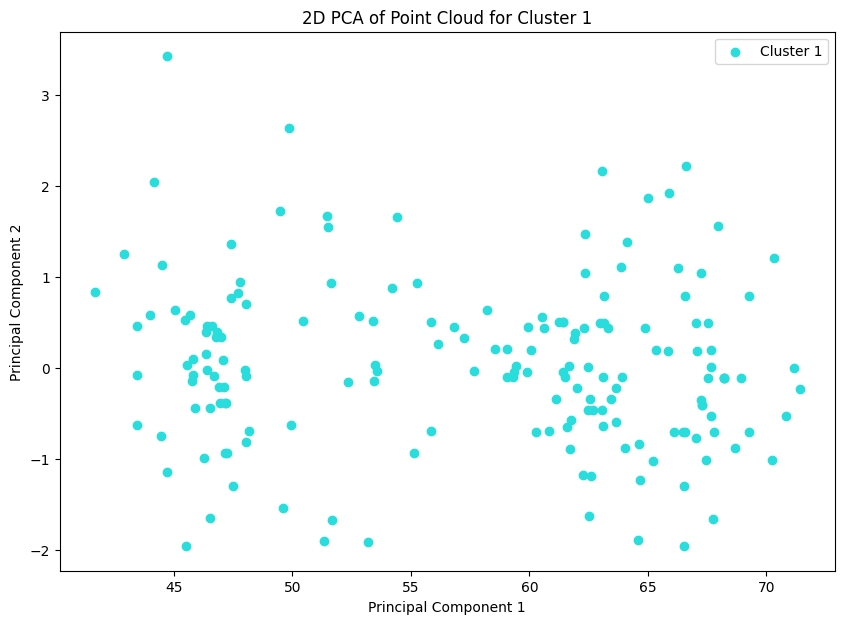

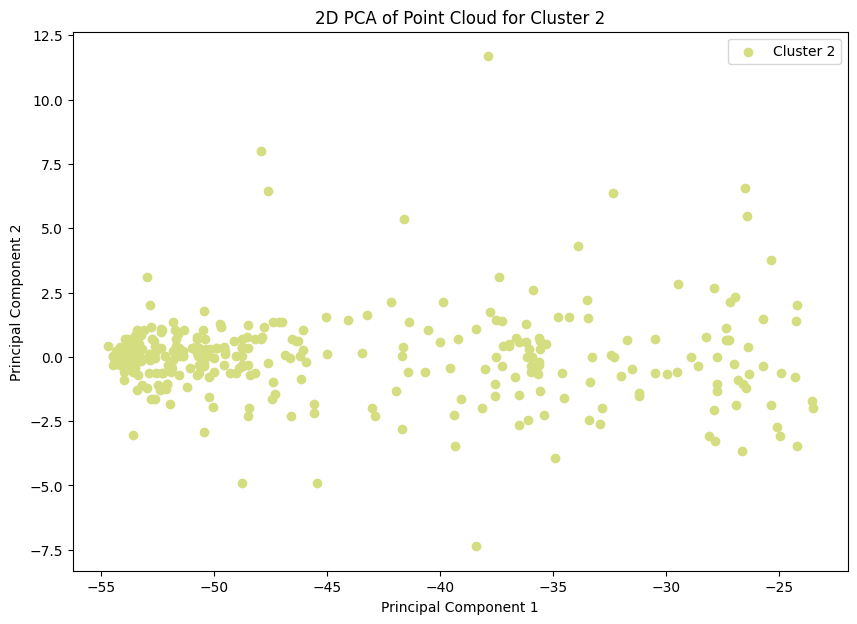

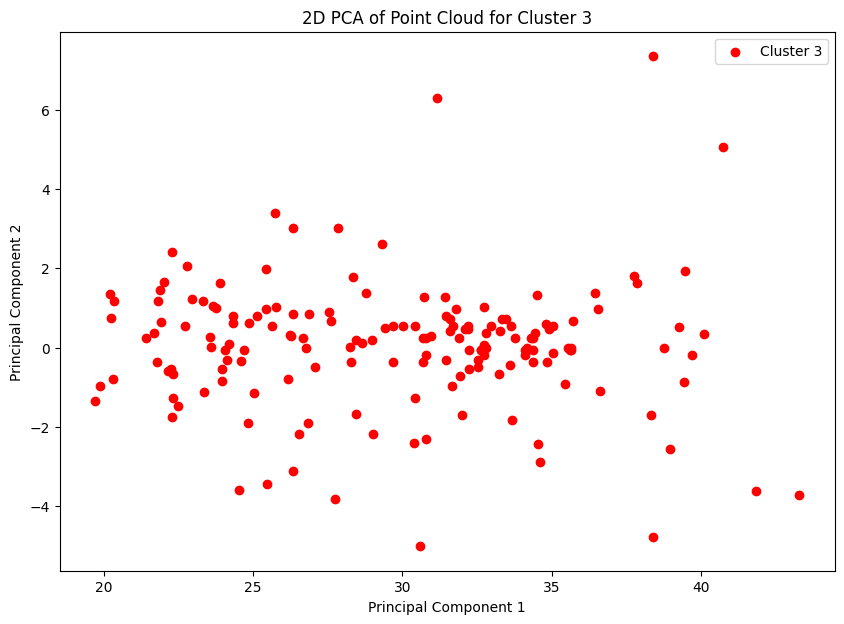

In [ ]:
# Perform Takens' Embedding
dimension = 3
time_series = df[' Open'].values
takens_embedding = SingleTakensEmbedding(parameters_type='fixed', time_delay=1, dimension=dimension)
point_cloud = takens_embedding.fit_transform(time_series)

# Calculate persistent homology
homology_dimensions = [0, 1]
vr_persistence = VietorisRipsPersistence(homology_dimensions=homology_dimensions, metric='euclidean', collapse_edges=False)
diagrams = vr_persistence.fit_transform(point_cloud[None, :, :])
plot_diagram(diagrams[0])
plt.show()

# Perform PCA on the point cloud
pca = PCA(n_components=2)
point_cloud_2d = pca.fit_transform(point_cloud)

# Perform hierarchical clustering on the PCA-transformed data
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(point_cloud_2d)

# Set up colors for each cluster
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))

# Plot PCA for each cluster separately with different colors
for cluster in range(n_clusters):
    plt.figure(figsize=(10, 7))
    cluster_points = point_cloud_2d[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', c=[colors[cluster]])

    plt.title(f'2D PCA of Point Cloud for Cluster {cluster}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

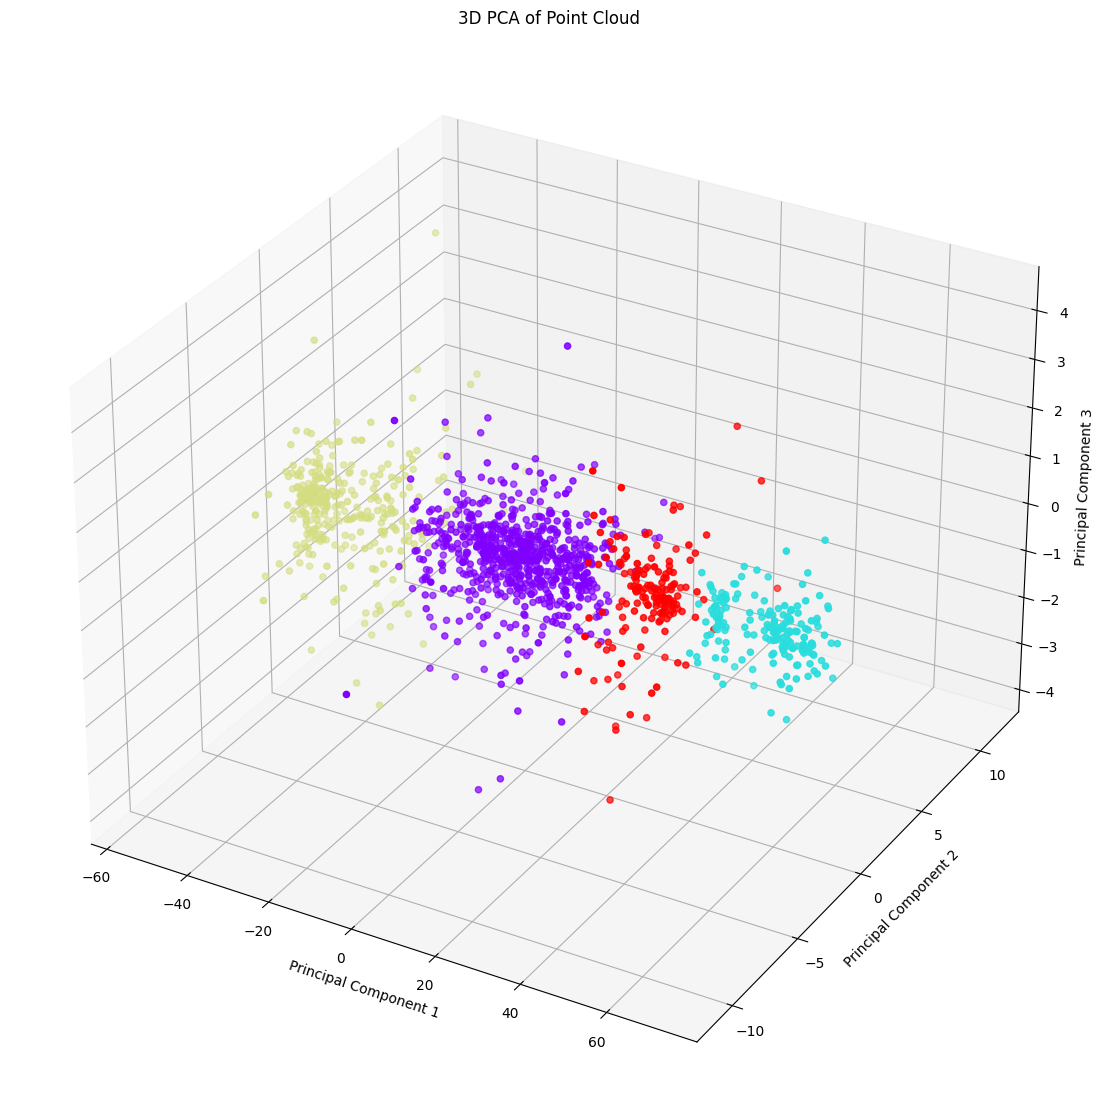

In [ ]:
# Perform PCA on the point cloud
pca_3d = PCA(n_components=3)
point_cloud_3d = pca_3d.fit_transform(point_cloud)

from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')
ax.scatter(point_cloud_3d[:, 0], point_cloud_3d[:, 1], point_cloud_3d[:, 2], c=cluster_labels, cmap='rainbow')
ax.set_title('3D PCA of Point Cloud')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


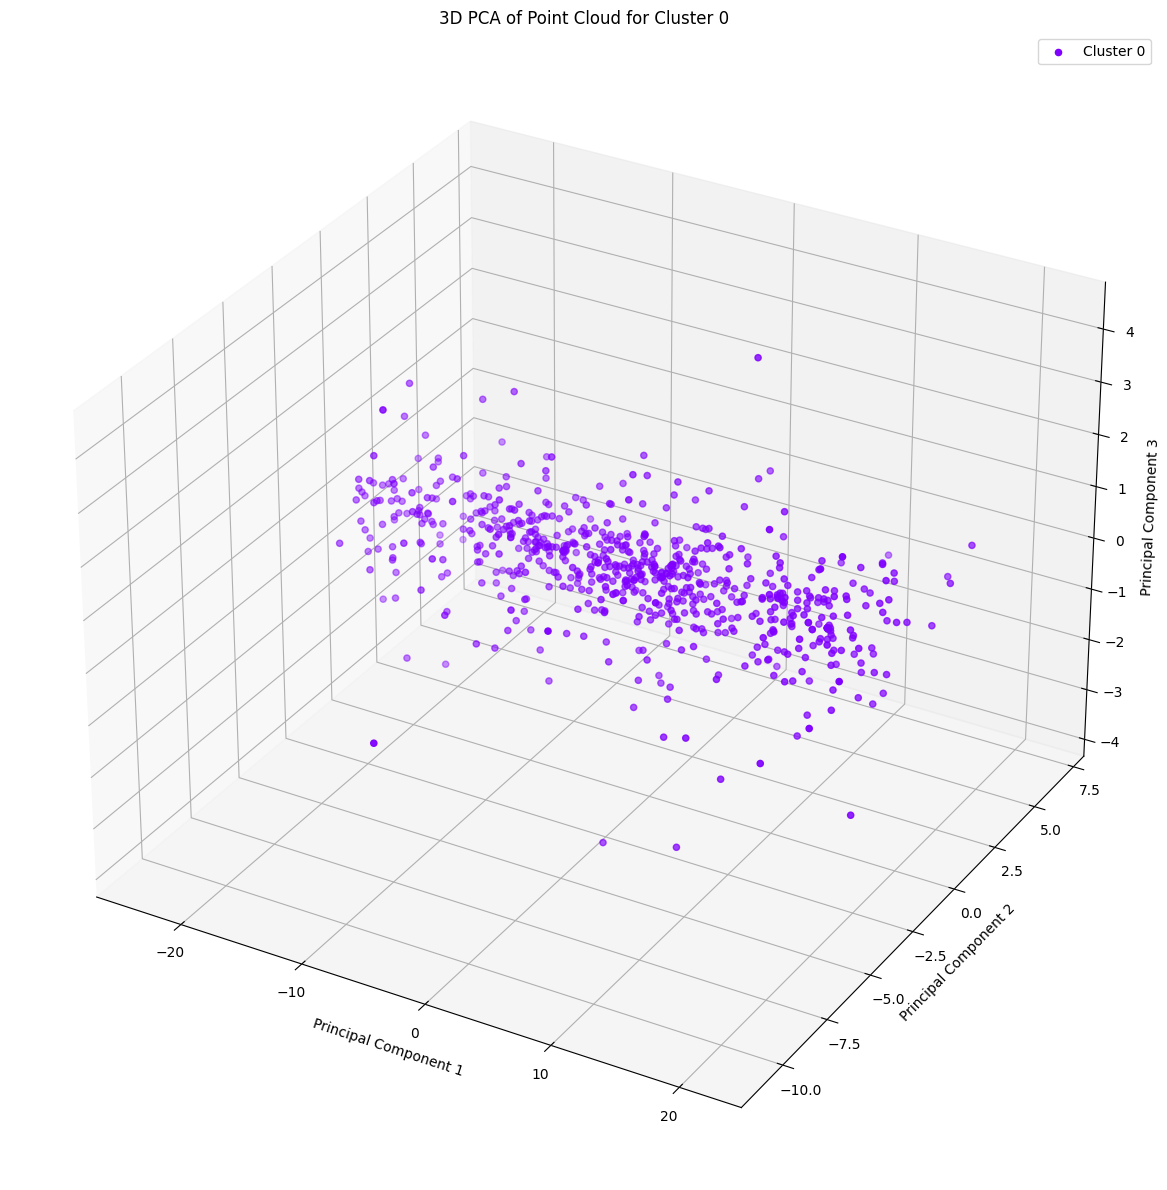

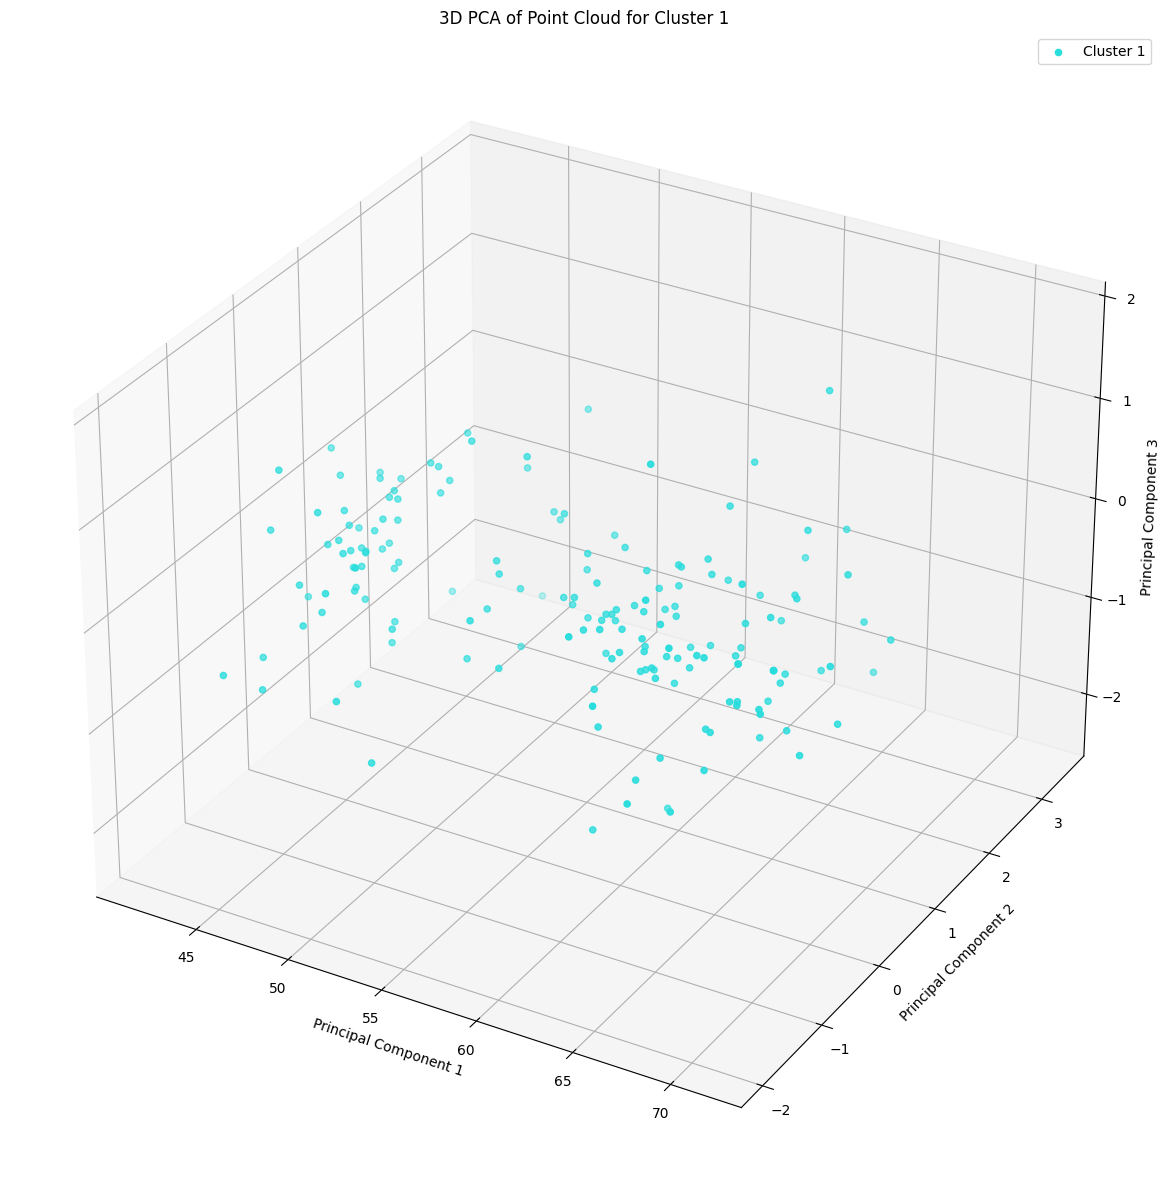

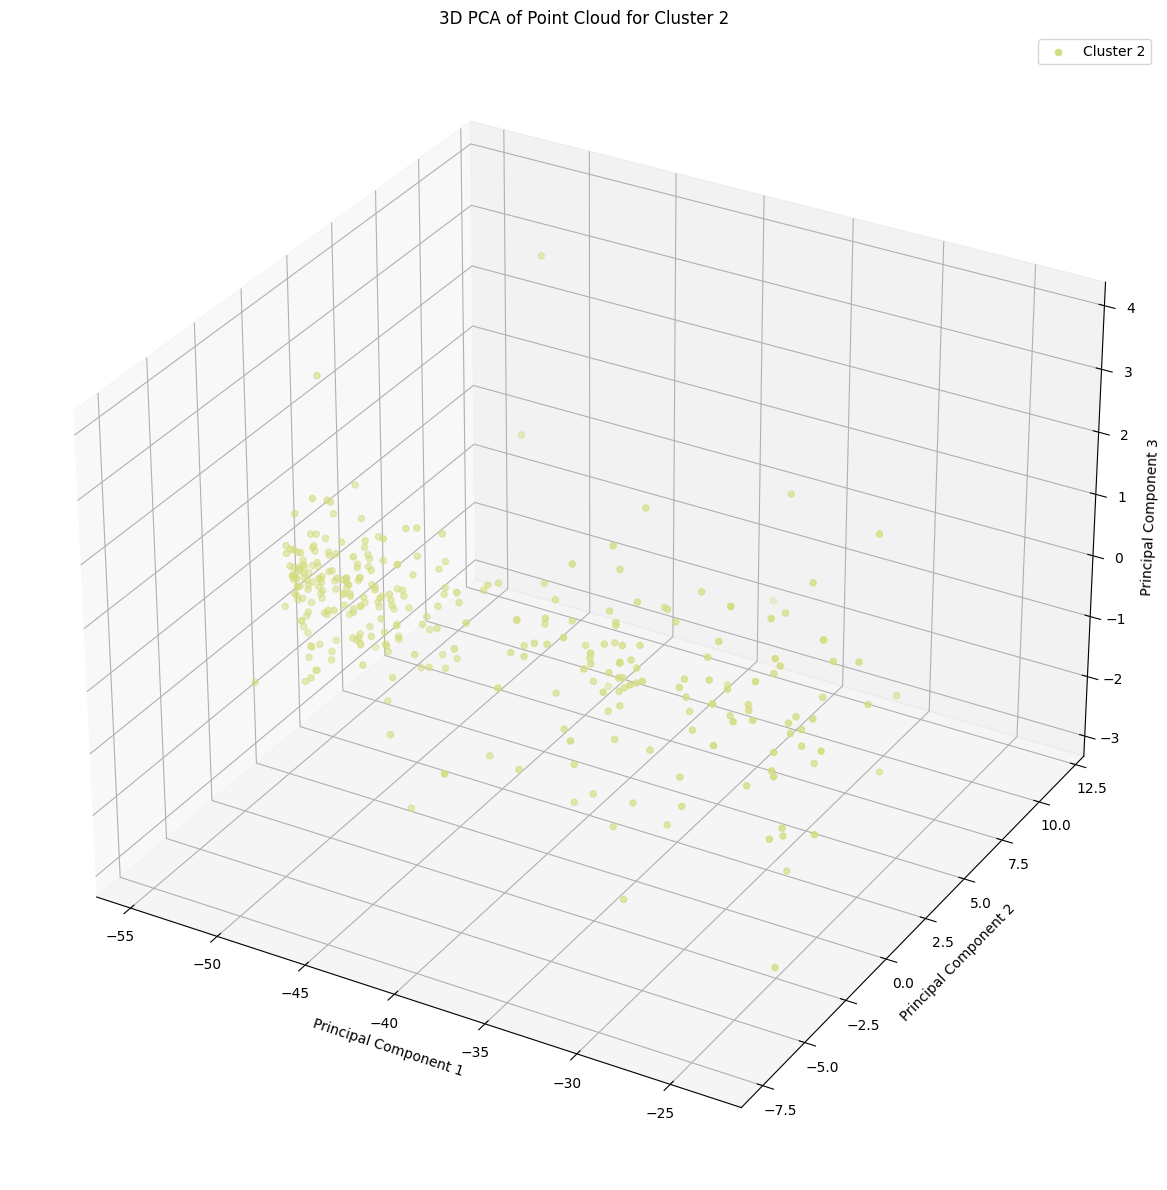

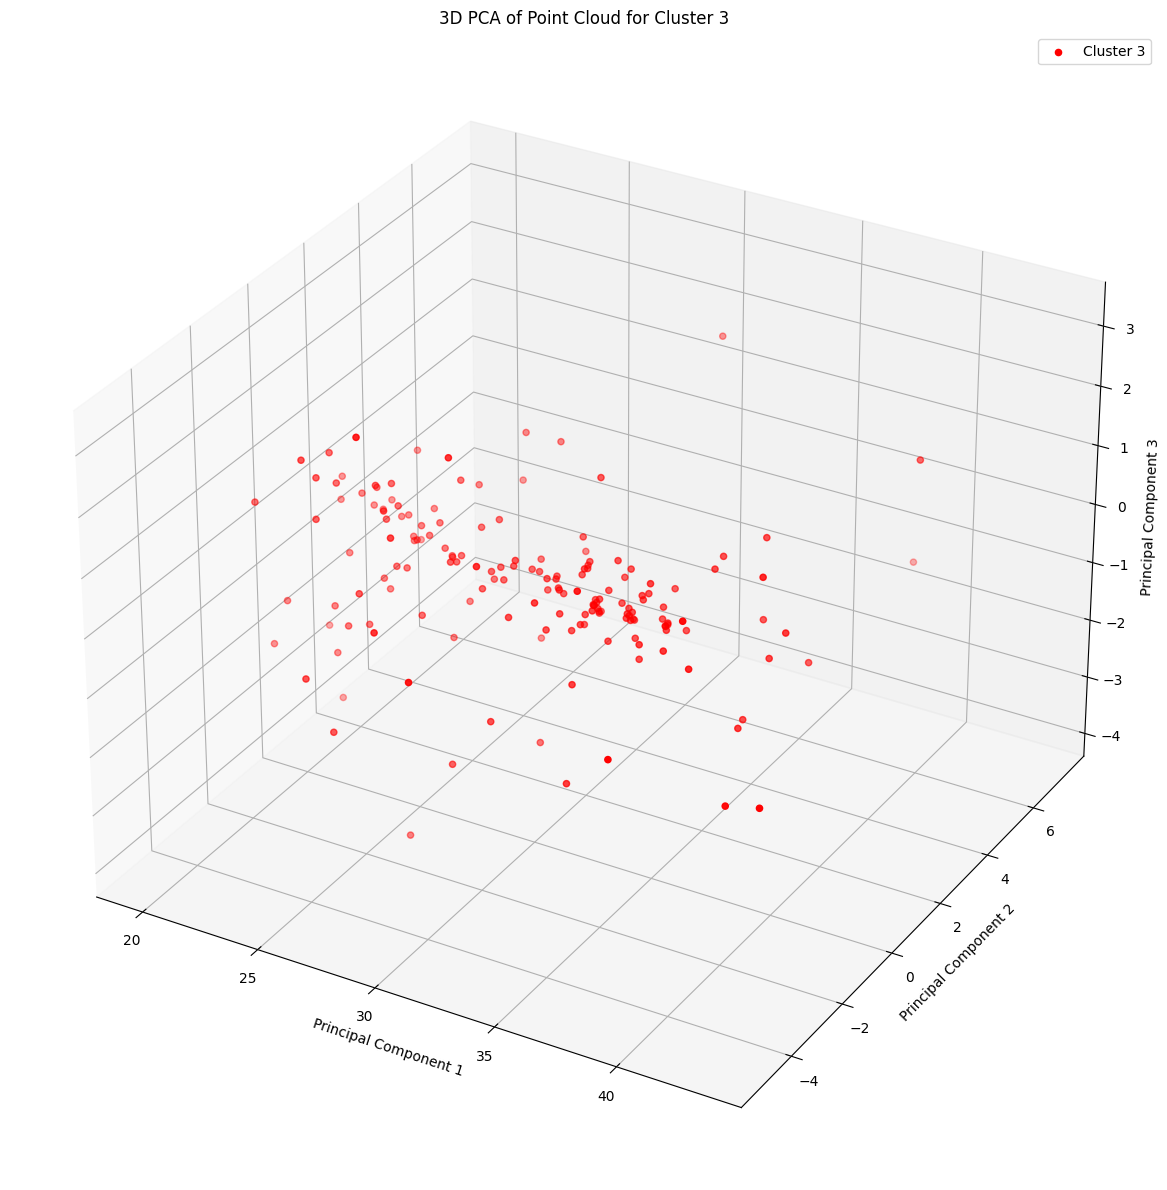

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'point_cloud_3d', 'cluster_labels', 'n_clusters', and 'colors' are defined

for cluster in range(n_clusters):
    cluster_points = point_cloud_3d[cluster_labels == cluster]

    # Increase the figure size
    plt.figure(figsize=(12, 12))  # Adjusted size

    ax = plt.axes(projection='3d')
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
               label=f'Cluster {cluster}', c=[colors[cluster]])

    ax.set_title(f'3D PCA of Point Cloud for Cluster {cluster}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.legend()

    # Adjust layout to make sure labels are visible
    plt.tight_layout()

    plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning:

Casting complex values to real discards the imaginary part



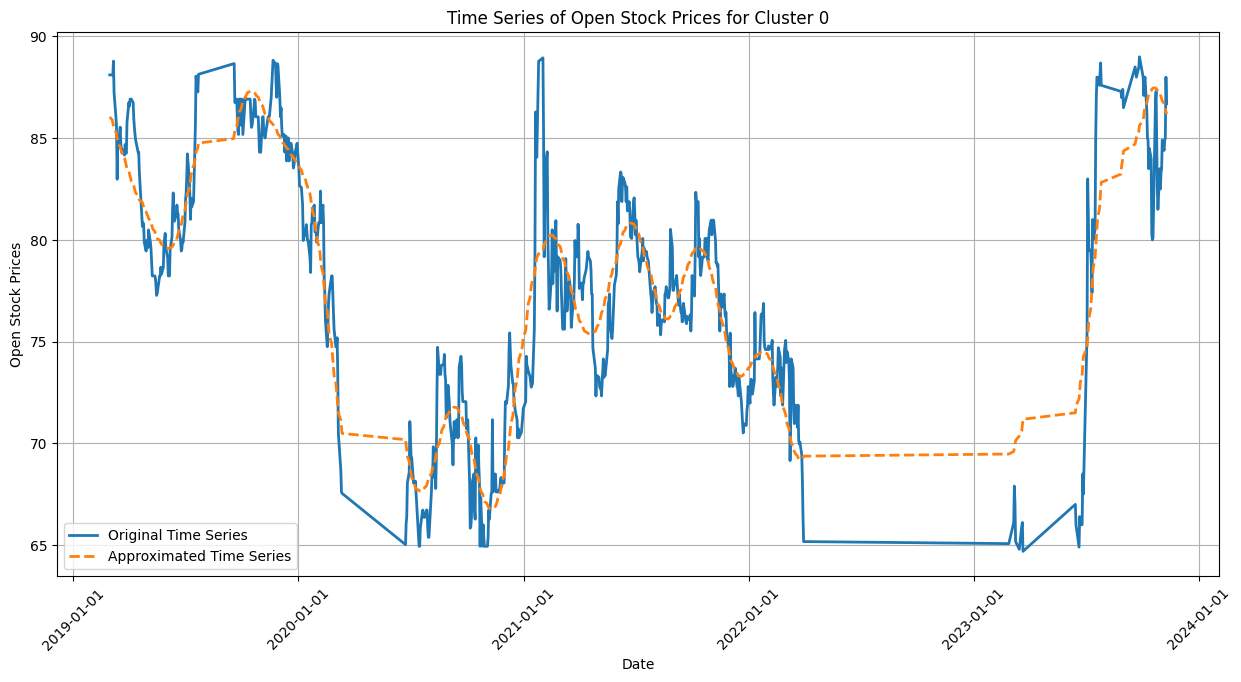

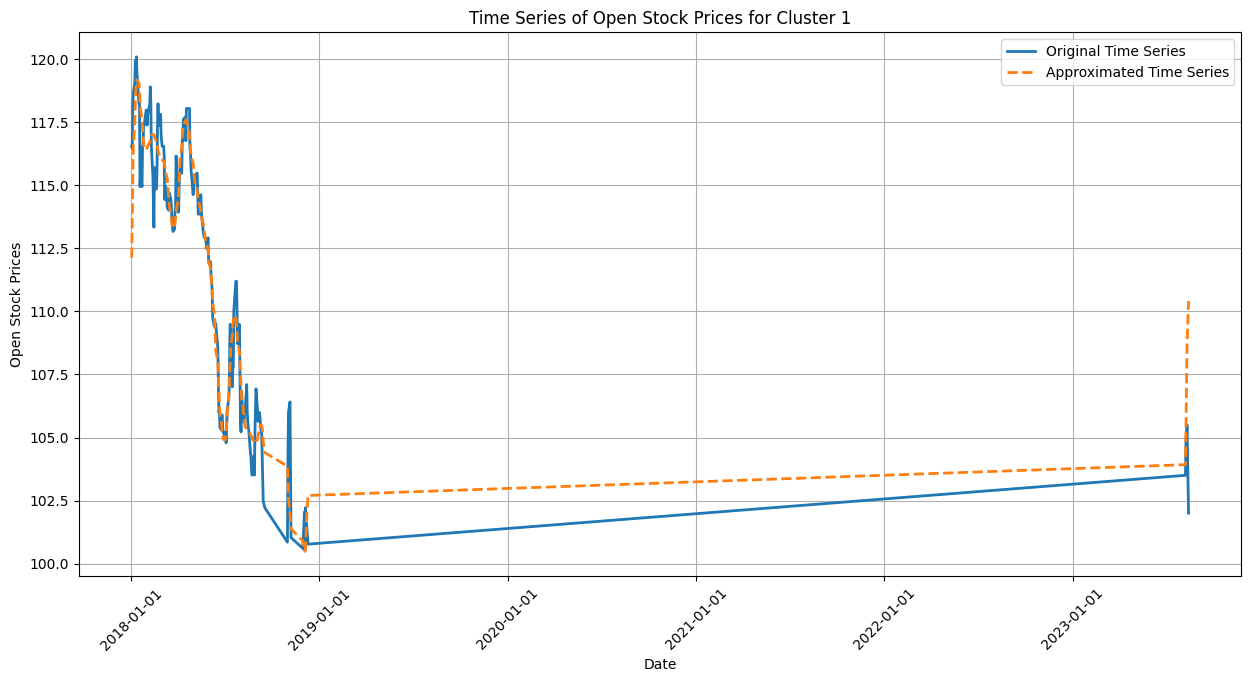

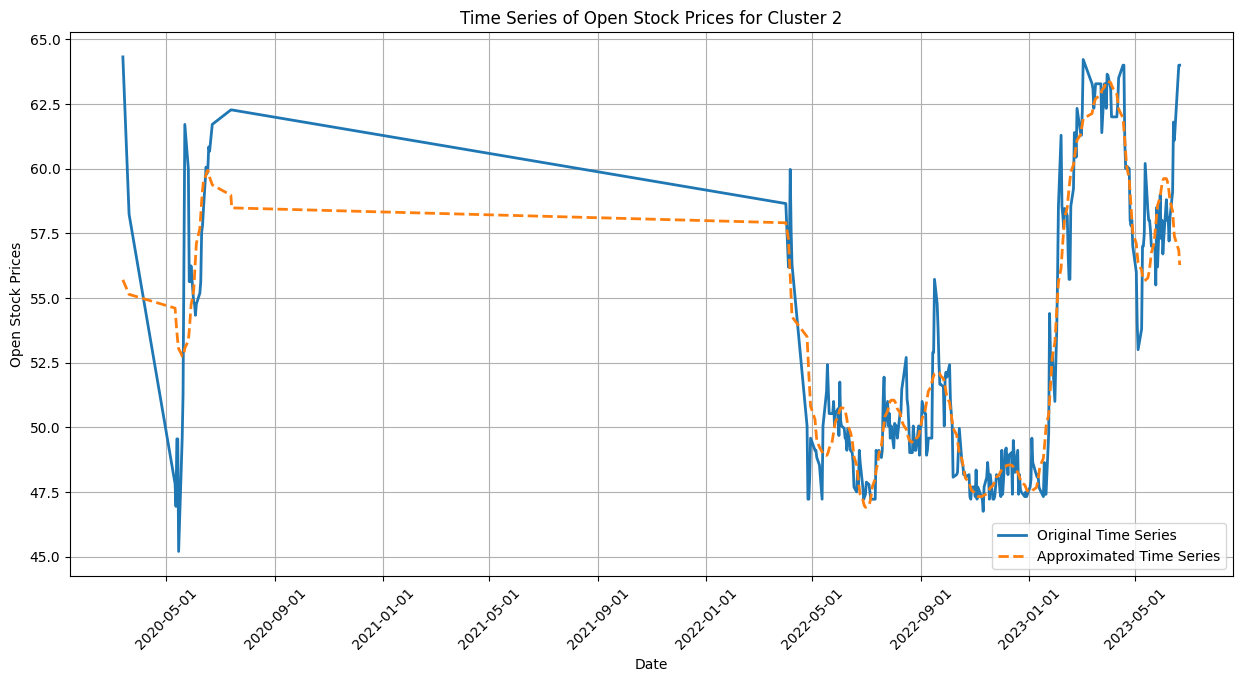

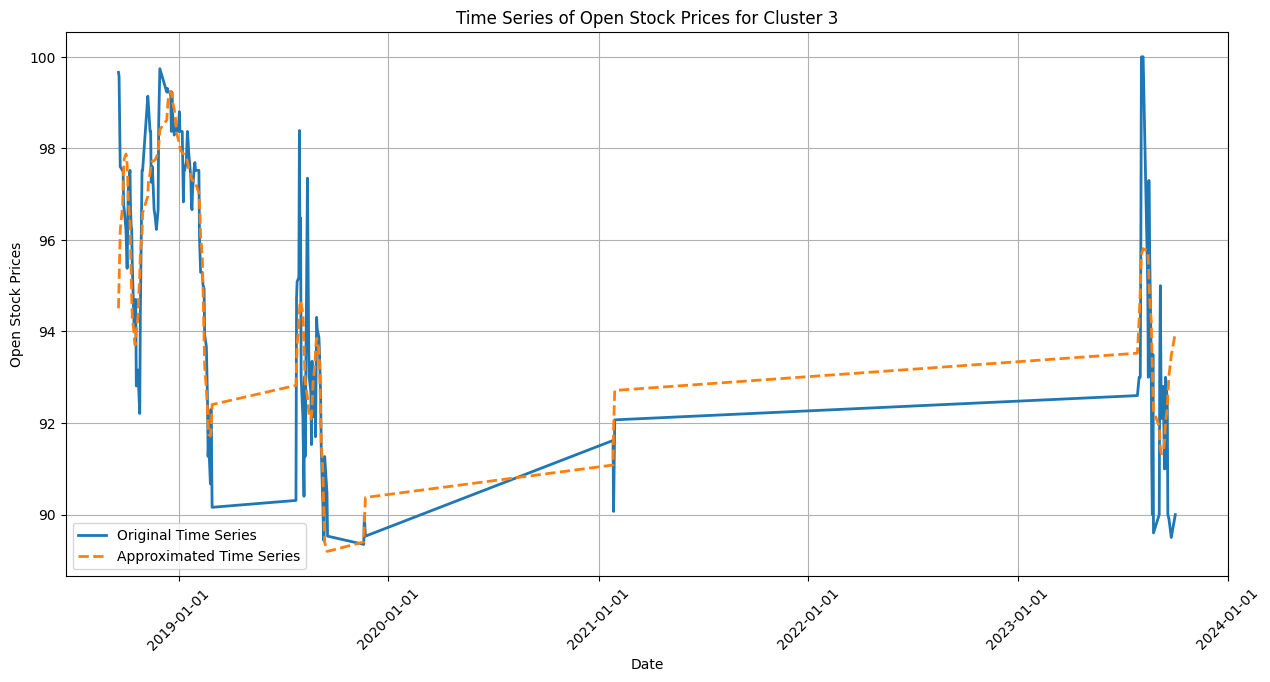

In [ ]:
# Assuming your DataFrame 'df' is already loaded
df.sort_index(inplace=True)
data_for_clustering = df[[' Open']].values

# Fit the AgglomerativeClustering model
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(data_for_clustering)

# Assign cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Number of components to keep (you can adjust this as needed)
num_components_to_keep = 10

# Plot the time series of open stock prices for each cluster
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]

    # Extracting the 'Open' prices time series
    time_series = cluster_data[' Open'].values

    # Perform the Fourier transform
    fourier_transform = fft(time_series)

    # Set coefficients beyond num_components_to_keep to zero
    fourier_transform[num_components_to_keep:-num_components_to_keep] = 0

    # Perform the inverse Fourier transform to get the approximated time series
    approximated_time_series = ifft(fourier_transform)

    # Plot the original and approximated time series for comparison
    plt.figure(figsize=(15, 8))  # Increased plot size
    plt.plot(cluster_data.index, time_series, label="Original Time Series", lw=2)
    plt.plot(cluster_data.index, approximated_time_series, label="Approximated Time Series", linestyle='dashed', lw=2)
    plt.title(f'Time Series of Open Stock Prices for Cluster {cluster}')
    plt.xlabel('Date')
    plt.ylabel('Open Stock Prices')
    plt.legend()
    plt.grid(True)

    # Set date formatter for x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.2)

    plt.show()


In [ ]:
# Perform PCA on the point cloud
pca = PCA(n_components=2)
point_cloud_2d = pca.fit_transform(point_cloud)

# Perform hierarchical clustering on the PCA-transformed data
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(point_cloud_2d)

# Print vectors for each cluster
for cluster in range(n_clusters):
    cluster_points = point_cloud_2d[cluster_labels == cluster]

    # X vectors for the cluster
    X_vectors = cluster_points[:, 0]
    # Y vectors for the cluster
    Y_vectors = cluster_points[:, 1]

    # Print the vectors
    print(f'Cluster {cluster}:')
    print('X Vectors:', X_vectors)
    print('Y Vectors:', Y_vectors)
    print()  # Adds an empty line for better readability


Cluster 0:
X Vectors: [ 1.36638932e+01  1.26220074e+01  1.05462535e+01  1.04887005e+01
  9.68030833e+00  9.04400208e+00  7.65922672e+00  7.65967594e+00
  6.62050873e+00  6.61922952e+00  7.43138367e+00  1.07814322e+01
  1.32623325e+01  1.14091699e+01  7.24964347e+00  3.32809483e+00
  2.52156102e+00  4.77562855e+00  7.37527001e+00  9.21866349e+00
  9.73816752e+00  1.00285121e+01  1.16444785e+01  1.34357147e+01
  1.50515834e+01  1.55112430e+01  1.55116761e+01  1.67841144e+01
  1.78804317e+01  1.81663586e+01  1.78790719e+01  1.73017742e+01
  1.81095267e+01  1.75336854e+01  1.86867429e+01  2.01913804e+01
  1.96054356e+01  1.60861869e+01  1.43578350e+01  1.48188080e+01
  1.60908625e+01  1.98466043e+01  2.14552169e+01  1.89715326e+01
  1.64364384e+01  1.64347573e+01  1.60310986e+01  1.59164076e+01
  1.55690045e+01  1.38353536e+01  9.50274713e+00  5.46111370e+00
  3.15665152e+00  1.36568529e+00  6.13345341e-01 -2.48004823e-01
  9.63452790e-01  2.46480875e+00  4.48729947e+00  2.17239338e+00
 -5

In [ ]:
from sklearn.cluster import KMeans

# Assuming you already have point_cloud_2d and n_clusters

# Apply K-Means clustering to the PCA-reduced data
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(point_cloud_2d)

# The cluster centers for each cluster
centroids = kmeans.cluster_centers_

# The labels for each point in the point_cloud_2d
kmeans_labels = kmeans.labels_

# Print the cluster centers and labels
print("Cluster Centers:\n", centroids)
print("Labels for each point:\n", kmeans_labels)

# Now, to print vectors for each cluster based on K-Means
for cluster in range(n_clusters):
    cluster_points = point_cloud_2d[kmeans_labels == cluster]

    # X vectors for the cluster
    X_vectors = cluster_points[:, 0]
    # Y vectors for the cluster
    Y_vectors = cluster_points[:, 1]

    # Print the vectors for the cluster
    print(f'Cluster {cluster}:')
    print('X Vectors:', X_vectors)
    print('Y Vectors:', Y_vectors)
    print()  # Adds an empty line for better readability


Cluster Centers:
 [[ 2.10098253e+01  1.16796686e-02]
 [-4.47249299e+01  3.86200387e-02]
 [-6.30333216e+00 -3.36766619e-02]
 [ 5.65556358e+01  1.66297627e-02]]
Labels for each point:
 [0 0 0 ... 3 3 3]
Cluster 0:
X Vectors: [13.66389317 12.62200741 10.54625348 10.48870047  9.68030833  9.04400208
  7.65922672  7.65967594  7.43138367 10.78143216 13.2623325  11.40916993
  7.37527001  9.21866349  9.73816752 10.02851209 11.64447851 13.43571471
 15.05158345 15.51124303 15.51167613 16.78411435 17.88043172 18.16635856
 17.87907194 17.30177418 18.10952671 17.53368541 18.68674291 20.19138043
 22.78929348 23.36314654 22.49576204 21.92102765 22.96115377 23.59515446
 24.17192344 25.44436165 26.25171034 24.51493697 19.60543561 16.0861869
 14.357835   14.818808   16.09086246 19.84660426 21.40272326 22.26394749
 22.26937545 25.73485126 29.31381648 29.02063459 28.4413082  31.16417794
 38.38406402 34.61978597 30.57486899 26.53619683 24.57601426 21.45521695
 18.97153259 16.43643839 16.43475732 16.03109859

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



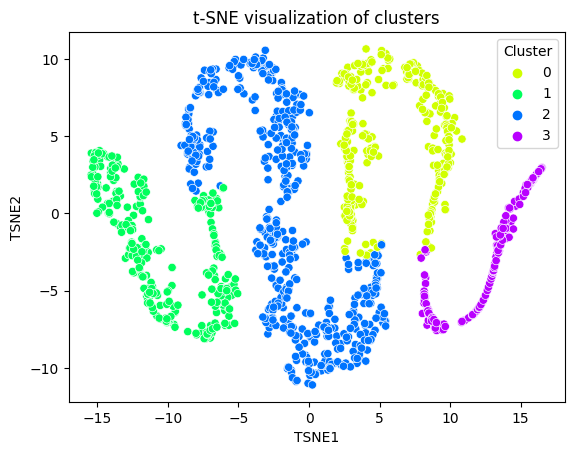

Statistics for Cluster 0:
Mean: [2.09680015e+01 2.06349865e-02]
Median: [19.65061169  0.08892933]
Standard Deviation: [9.01475075 1.56666163]

Statistics for Cluster 1:
Mean: [-4.47249299e+01  3.86200387e-02]
Median: [-4.86253095e+01  2.81189606e-02]
Standard Deviation: [8.94444223 1.7178061 ]

Statistics for Cluster 2:
Mean: [-6.32806743 -0.03903795]
Median: [-4.58564239  0.03505243]
Standard Deviation: [8.53165513 1.38335492]

Statistics for Cluster 3:
Mean: [5.65556358e+01 1.66297627e-02]
Median: [ 5.93558495e+01 -3.41975581e-02]
Standard Deviation: [9.15232441 1.07051662]

PCA Loadings:
                   PC1        PC2
 Open   -1.412926e+00  18.904974
 High   -1.304837e+00  18.951786
 Low    -1.539424e+00  18.985366
 Close  -1.462518e+00  18.964053
 Volume  2.244132e+06   0.000048
Cluster -2.928024e-02  -0.062782


In [ ]:
# Ensure that 'df' is your pandas DataFrame and ' Open' is the name of the column you're using.
# Let's reshape 'original_data' to be a 2D array.
original_data = df.values  # Double brackets keep it as a DataFrame, .values gets the numpy array.

# Assuming 'point_cloud_2d' is your PCA-reduced data and 'kmeans_labels' are your cluster labels.

# 1. t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(point_cloud_2d)

# Create a DataFrame to hold the results and the cluster labels
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = kmeans_labels

# Plot the clusters
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette=sns.color_palette("hsv", len(set(kmeans_labels))), data=tsne_df)
plt.title('t-SNE visualization of clusters')
plt.show()

# 2. Statistical Summary for each cluster
for cluster in range(n_clusters):
    cluster_points = point_cloud_2d[kmeans_labels == cluster]
    print(f'Statistics for Cluster {cluster}:')
    print(f'Mean: {np.mean(cluster_points, axis=0)}')
    print(f'Median: {np.median(cluster_points, axis=0)}')
    print(f'Standard Deviation: {np.std(cluster_points, axis=0)}')
    print()

# 3. Analyzing PCA Loadings

# Now, we need to fit PCA to our 2D data.
pca = PCA(n_components=2)  # Only makes sense if at least 2 features
pca.fit(original_data) # No error here as 'original_data' is now a 2D array.

# Calculate loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.columns)  # Assuming df has the correct columns

print('PCA Loadings:\n', loading_matrix)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


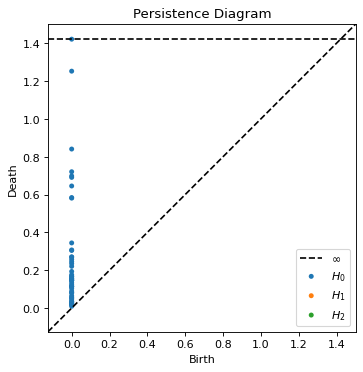

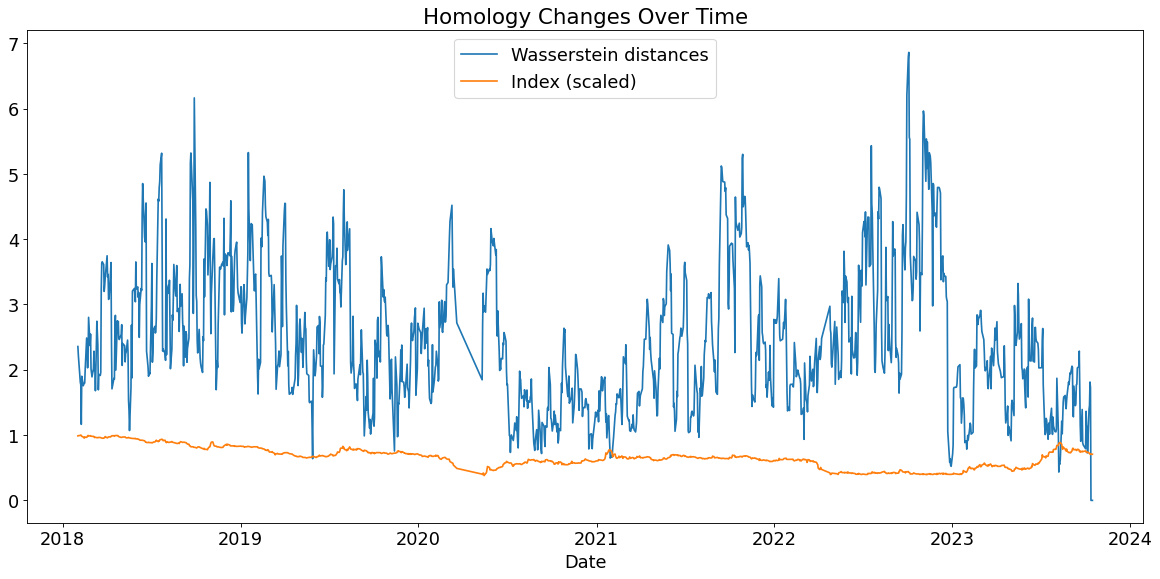

In [ ]:
# Suppress warnings (optional)
import warnings
warnings.filterwarnings("ignore")

# Assuming df is your DataFrame and it has been loaded
# Ensure all values in 'P' are positive and non-zero
df[df <= 0] = np.nan

# Replace NaN values (you can choose a different strategy if needed)
df.fillna(method='ffill', inplace=True)  # Forward fill
df.dropna(inplace=True)  # Drop any remaining NaNs

# Data preparation: computing log-returns
P = df.to_numpy()
r = np.log(np.divide(P[1:], P[:-1]))

# Check for NaN, inf, -inf in 'r' and handle them
r = np.nan_to_num(r)  # Replace NaN, inf, -inf with 0 (or choose another method)

# Instantiate Vietoris-Rips solver
rips = Rips(maxdim=2)
dgm = rips.fit_transform(r[0:50])

# Plot persistence diagram
plt.figure(figsize=(5, 5), dpi=80)
plt.rcParams.update({'font.size': 10})
persim.plot_diagrams(dgm, title="Persistence Diagram")
plt.show()

# Parameters for Wasserstein distance calculation
w = 20  # Time window size
n = len(df) - (2 * w) + 1  # Number of time segments
wasserstein_dists = np.zeros((n, 1))  # Initialize array for Wasserstein distances

# Compute Wasserstein distances
for i in range(n):
    # Make sure we have enough data points in each slice
    if i + (2 * w) + 1 > len(r):
        break

    dgm1 = rips.fit_transform(r[i:i+w])
    dgm2 = rips.fit_transform(r[i+w+1:i+(2*w)+1])

    if len(dgm1[0]) > 0 and len(dgm2[0]) > 0:  # Check if diagrams are not empty
        wasserstein_dists[i] = persim.wasserstein(dgm1[0], dgm2[0], matching=False)

# Plot Wasserstein distances
plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 16})
plt.plot(df.index[w:n+w], wasserstein_dists)
plt.plot(df.index[w:n+w], df.iloc[w:n+w, 0] / max(df.iloc[w:n+w, 0]))
plt.legend(['Wasserstein distances', 'Index (scaled)'])
plt.xlabel('Date')
plt.title('Homology Changes Over Time')
plt.show()


TDA Parameters: {'resolution': [5, 5]}, Silhouette Score: 0.5615
TDA Parameters: {'resolution': [10, 10]}, Silhouette Score: 0.5615
TDA Parameters: {'resolution': [20, 20]}, Silhouette Score: 0.5615


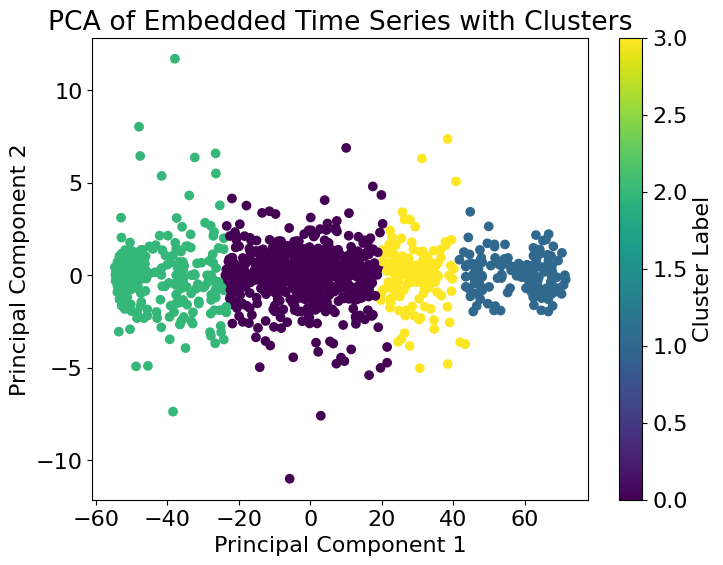

In [ ]:
# Assuming 'Open' is a column in your CSV
time_series = df[' Open'].values

# Perform Takens' Embedding
dimension = 3
embedding = SingleTakensEmbedding(parameters_type='fixed', time_delay=1, dimension=dimension)
embedded_time_series = embedding.fit_transform(time_series)

# Perform PCA
pca = PCA(n_components=2)
point_cloud_2d = pca.fit_transform(embedded_time_series)

# Evaluate clustering performance for different TDA parameters
tda_parameters = [{'resolution': [5, 5]}, {'resolution': [10, 10]}, {'resolution': [20, 20]}]
n_clusters = 4

for params in tda_parameters:
    # Perform clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clustering.fit_predict(point_cloud_2d)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(point_cloud_2d, cluster_labels)
    print(f"TDA Parameters: {params}, Silhouette Score: {silhouette_avg:.4f}")

# Plot PCA with clusters
plt.figure(figsize=(8, 6))
plt.scatter(point_cloud_2d[:, 0], point_cloud_2d[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Embedded Time Series with Clusters')
plt.colorbar(label='Cluster Label')
plt.show()


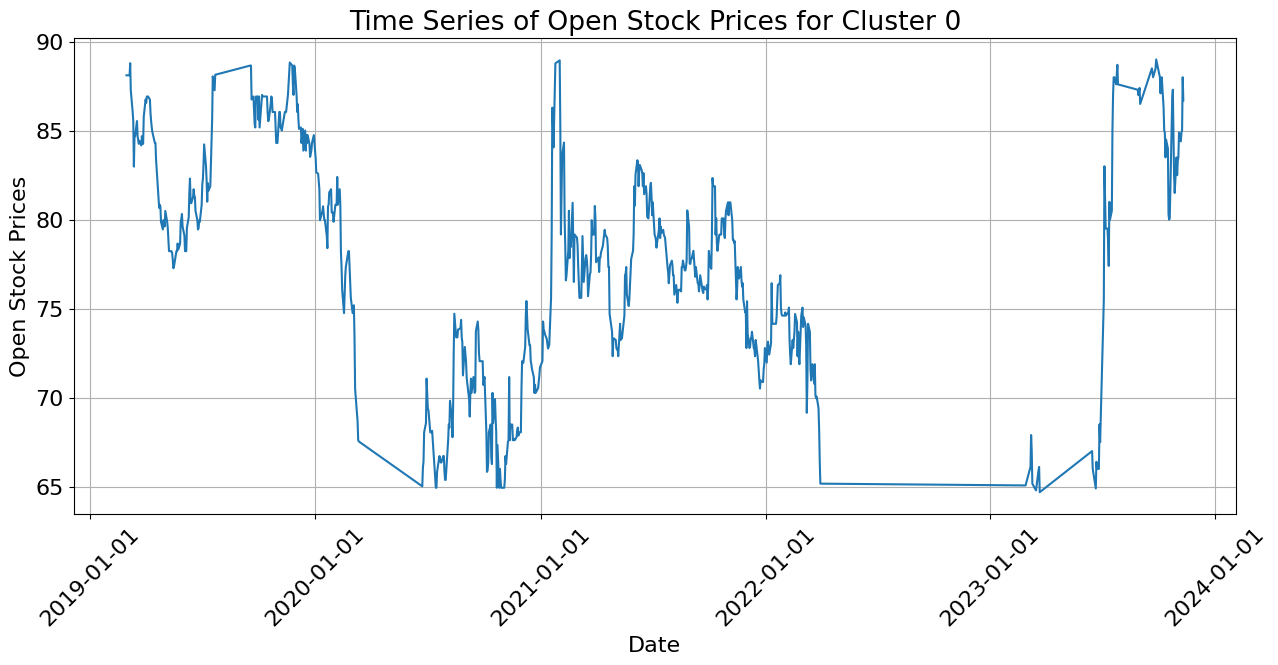

Coordinates for Cluster 0:
Date: 2019-03-01 00:00:00, Open Stock Price: 88.11
Date: 2019-03-05 00:00:00, Open Stock Price: 88.11
Date: 2019-03-06 00:00:00, Open Stock Price: 88.11
Date: 2019-03-07 00:00:00, Open Stock Price: 88.79
Date: 2019-03-08 00:00:00, Open Stock Price: 87.25
Date: 2019-03-11 00:00:00, Open Stock Price: 86.06
Date: 2019-03-12 00:00:00, Open Stock Price: 85.54
Date: 2019-03-13 00:00:00, Open Stock Price: 82.98
Date: 2019-03-14 00:00:00, Open Stock Price: 84.69
Date: 2019-03-15 00:00:00, Open Stock Price: 84.69


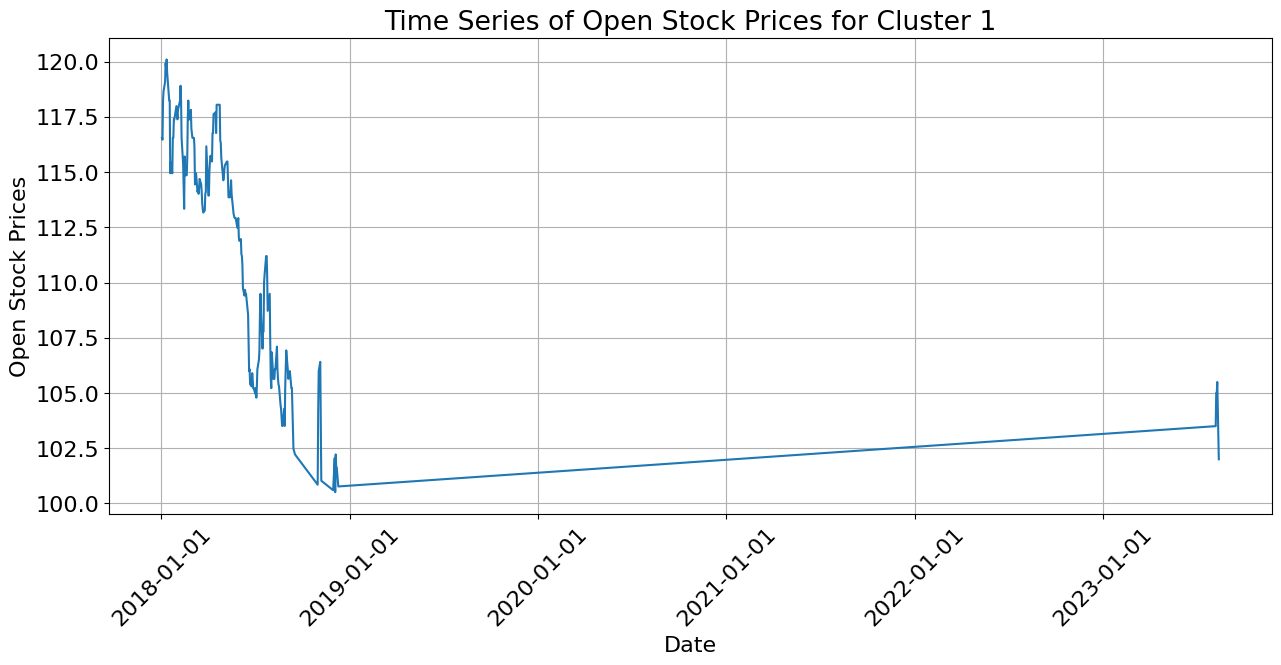

Coordinates for Cluster 1:
Date: 2018-01-02 00:00:00, Open Stock Price: 116.55
Date: 2018-01-03 00:00:00, Open Stock Price: 116.47
Date: 2018-01-04 00:00:00, Open Stock Price: 118.24
Date: 2018-01-05 00:00:00, Open Stock Price: 118.66
Date: 2018-01-08 00:00:00, Open Stock Price: 119.08
Date: 2018-01-09 00:00:00, Open Stock Price: 119.93
Date: 2018-01-10 00:00:00, Open Stock Price: 119.67
Date: 2018-01-11 00:00:00, Open Stock Price: 120.1
Date: 2018-01-12 00:00:00, Open Stock Price: 119.51
Date: 2018-01-16 00:00:00, Open Stock Price: 118.24


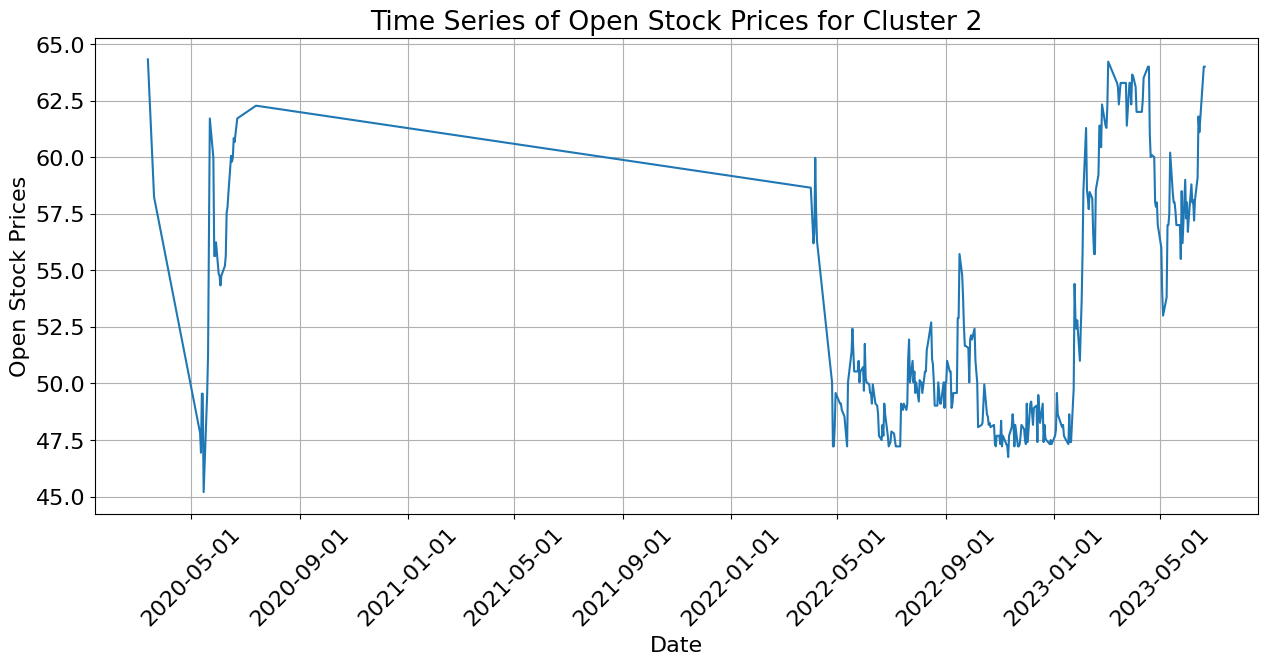

Coordinates for Cluster 2:
Date: 2020-03-13 00:00:00, Open Stock Price: 64.32
Date: 2020-03-20 00:00:00, Open Stock Price: 58.24
Date: 2020-05-11 00:00:00, Open Stock Price: 47.81
Date: 2020-05-12 00:00:00, Open Stock Price: 46.94
Date: 2020-05-13 00:00:00, Open Stock Price: 49.55
Date: 2020-05-14 00:00:00, Open Stock Price: 49.55
Date: 2020-05-15 00:00:00, Open Stock Price: 45.2
Date: 2020-05-18 00:00:00, Open Stock Price: 48.5
Date: 2020-05-19 00:00:00, Open Stock Price: 49.55
Date: 2020-05-20 00:00:00, Open Stock Price: 51.28


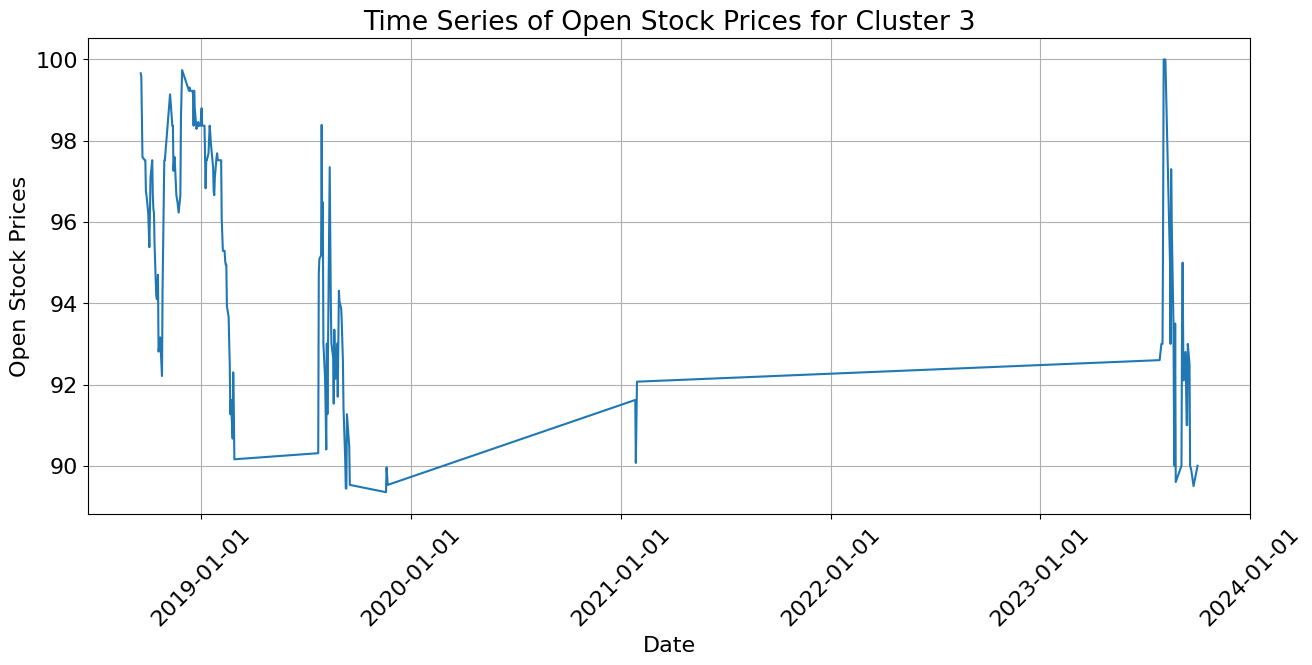

Coordinates for Cluster 3:
Date: 2018-09-18 00:00:00, Open Stock Price: 99.66
Date: 2018-09-19 00:00:00, Open Stock Price: 99.57
Date: 2018-09-20 00:00:00, Open Stock Price: 98.63
Date: 2018-09-21 00:00:00, Open Stock Price: 97.6
Date: 2018-09-25 00:00:00, Open Stock Price: 97.52
Date: 2018-09-26 00:00:00, Open Stock Price: 97.52
Date: 2018-09-27 00:00:00, Open Stock Price: 96.75
Date: 2018-09-28 00:00:00, Open Stock Price: 96.66
Date: 2018-10-01 00:00:00, Open Stock Price: 96.23
Date: 2018-10-02 00:00:00, Open Stock Price: 95.81


In [ ]:
# Assuming 'df' is already loaded and its index is converted to datetime
data_for_clustering = df[[' Open']].values

# Fit the AgglomerativeClustering model
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(data_for_clustering)

# Assign cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Maximum number of points to print per cluster
max_points_to_print = 10

# Plot and print coordinates for each cluster
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]

    # Plotting
    plt.figure(figsize=(15, 7))
    plt.plot(cluster_data[' Open'])
    plt.title(f'Time Series of Open Stock Prices for Cluster {cluster}')
    plt.xlabel('Date')
    plt.ylabel('Open Stock Prices')
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.2)
    plt.show()

    # Printing coordinates
    print(f"Coordinates for Cluster {cluster}:")
    for index, row in cluster_data.iterrows():
        print(f"Date: {index}, Open Stock Price: {row[' Open']}")
        max_points_to_print -= 1
        if max_points_to_print <= 0:
            break
    max_points_to_print = 10  # Reset for the next cluster